In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_excel("C:\\Users\\Akram siddiqui\\documents\\ExcelR\\Data science assignments\\Decision Tree\\heart_disease.xlsx", sheet_name = 'Heart_disease', index_col=0)
df

,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,,,,,,,,,,,,
63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4


In [4]:
df['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

In [5]:
df.drop(columns =['cp','fbs','restecg','exang','slope','sex','oldpeak'], inplace = True)
df

,trestbps,chol,thalch,thal,num
age,,,,,
63,145,233,150,fixed defect,0
41,135,203,132,fixed defect,0
57,140,192,148,fixed defect,0
52,118,186,190,fixed defect,0
57,110,201,126,fixed defect,0
...,...,...,...,...,...
53,125,0,120,reversable defect,4
62,166,170,120,reversable defect,4
56,170,0,123,normal,4


In [6]:
df.describe()

,trestbps,chol,thalch,num
count,908.000000,908.000000,908.000000,908.000000
mean,133.430617,201.484581,135.957048,1.008811
std,20.401608,112.097949,26.804929,1.144436
min,0.000000,0.000000,60.000000,0.000000
25%,120.000000,176.750000,118.000000,0.000000
50%,130.000000,224.000000,138.000000,1.000000
75%,144.000000,270.000000,156.000000,2.000000
max,200.000000,603.000000,202.000000,4.000000


In [7]:
df.hist()
plt.tight_layout()

In [8]:
df.boxplot()
plt.tight_layout()

In [9]:
df.isna().sum()

trestbps    0
chol        0
thalch      0
thal        0
num         0
dtype: int64

In [10]:
df.duplicated().sum()

3

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [14]:
sc = StandardScaler()

In [15]:
df.describe()

,trestbps,chol,thalch,num
count,905.000000,905.000000,905.000000,905.000000
mean,133.458564,201.910497,136.003315,1.006630
std,20.403905,111.880812,26.836134,1.145383
min,0.000000,0.000000,60.000000,0.000000
25%,120.000000,177.000000,118.000000,0.000000
50%,130.000000,224.000000,138.000000,1.000000
75%,144.000000,270.000000,156.000000,2.000000
max,200.000000,603.000000,202.000000,4.000000


In [16]:
df.head()

,trestbps,chol,thalch,thal,num
age,,,,,
63,145,233,150,fixed defect,0
41,135,203,132,fixed defect,0
57,140,192,148,fixed defect,0
52,118,186,190,fixed defect,0
57,110,201,126,fixed defect,0


In [17]:
x = df.drop(columns = ['thal'])
y = df['thal']

In [18]:
x

,trestbps,chol,thalch,num
age,,,,
63,145,233,150,0
41,135,203,132,0
57,140,192,148,0
52,118,186,190,0
57,110,201,126,0
...,...,...,...,...
53,125,0,120,4
62,166,170,120,4
56,170,0,123,4


In [19]:
y

age
63         fixed defect
41         fixed defect
57         fixed defect
52         fixed defect
57         fixed defect
            ...        
53    reversable defect
62    reversable defect
56               normal
56         fixed defect
57    reversable defect
Name: thal, Length: 905, dtype: object

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [21]:
dt = DecisionTreeClassifier(criterion='entropy')  # C5.0

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array(['normal', 'fixed defect', 'reversable defect', 'normal',
       'reversable defect', 'reversable defect', 'reversable defect',
       'normal', 'normal', 'normal', 'reversable defect', 'normal',
       'fixed defect', 'reversable defect', 'reversable defect',
       'reversable defect', 'fixed defect', 'fixed defect',
       'reversable defect', 'fixed defect', 'reversable defect', 'normal',
       'normal', 'reversable defect', 'normal', 'normal', 'normal',
       'fixed defect', 'fixed defect', 'fixed defect',
       'reversable defect', 'normal', 'reversable defect',
       'reversable defect', 'reversable defect', 'reversable defect',
       'fixed defect', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'fixed defect', 'reversable defect',
       'reversable defect', 'normal', 'fixed defect', 'normal', 'normal',
       'normal', 'reversable defect', 'normal', 'fixed defect',
       'reversable defect', 'normal', 'normal', 'reversable defect',
  

In [22]:
xtest

,trestbps,chol,thalch,num
age,,,,
67,100,299,125,3
68,120,211,115,0
64,130,258,130,2
50,120,219,158,0
71,130,221,115,3
...,...,...,...,...
57,124,261,141,1
66,112,261,140,1
42,160,147,146,0


# Model Evaluation

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(classification_report(ytest,ypred))

                   precision    recall  f1-score   support

     fixed defect       0.11      0.12      0.12        33
           normal       0.44      0.44      0.44        82
reversable defect       0.32      0.32      0.32        66

         accuracy                           0.34       181
        macro avg       0.29      0.29      0.29       181
     weighted avg       0.34      0.34      0.34       181



In [25]:
confusion_matrix(ytest,ypred)

array([[ 4, 16, 13],
       [15, 36, 31],
       [16, 29, 21]], dtype=int64)

In [26]:
dt.score(xtrain,ytrain)

0.9958563535911602

In [27]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  0.9958563535911602
Testing Accuracy:  0.3370165745856354


In [28]:
x.columns

Index(['trestbps', 'chol', 'thalch', 'num'], dtype='object')

In [29]:
x.head()

,trestbps,chol,thalch,num
age,,,,
63,145,233,150,0
41,135,203,132,0
57,140,192,148,0
52,118,186,190,0
57,110,201,126,0


In [30]:
df.head()

,trestbps,chol,thalch,thal,num
age,,,,,
63,145,233,150,fixed defect,0
41,135,203,132,fixed defect,0
57,140,192,148,fixed defect,0
52,118,186,190,fixed defect,0
57,110,201,126,fixed defect,0


In [31]:
df['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

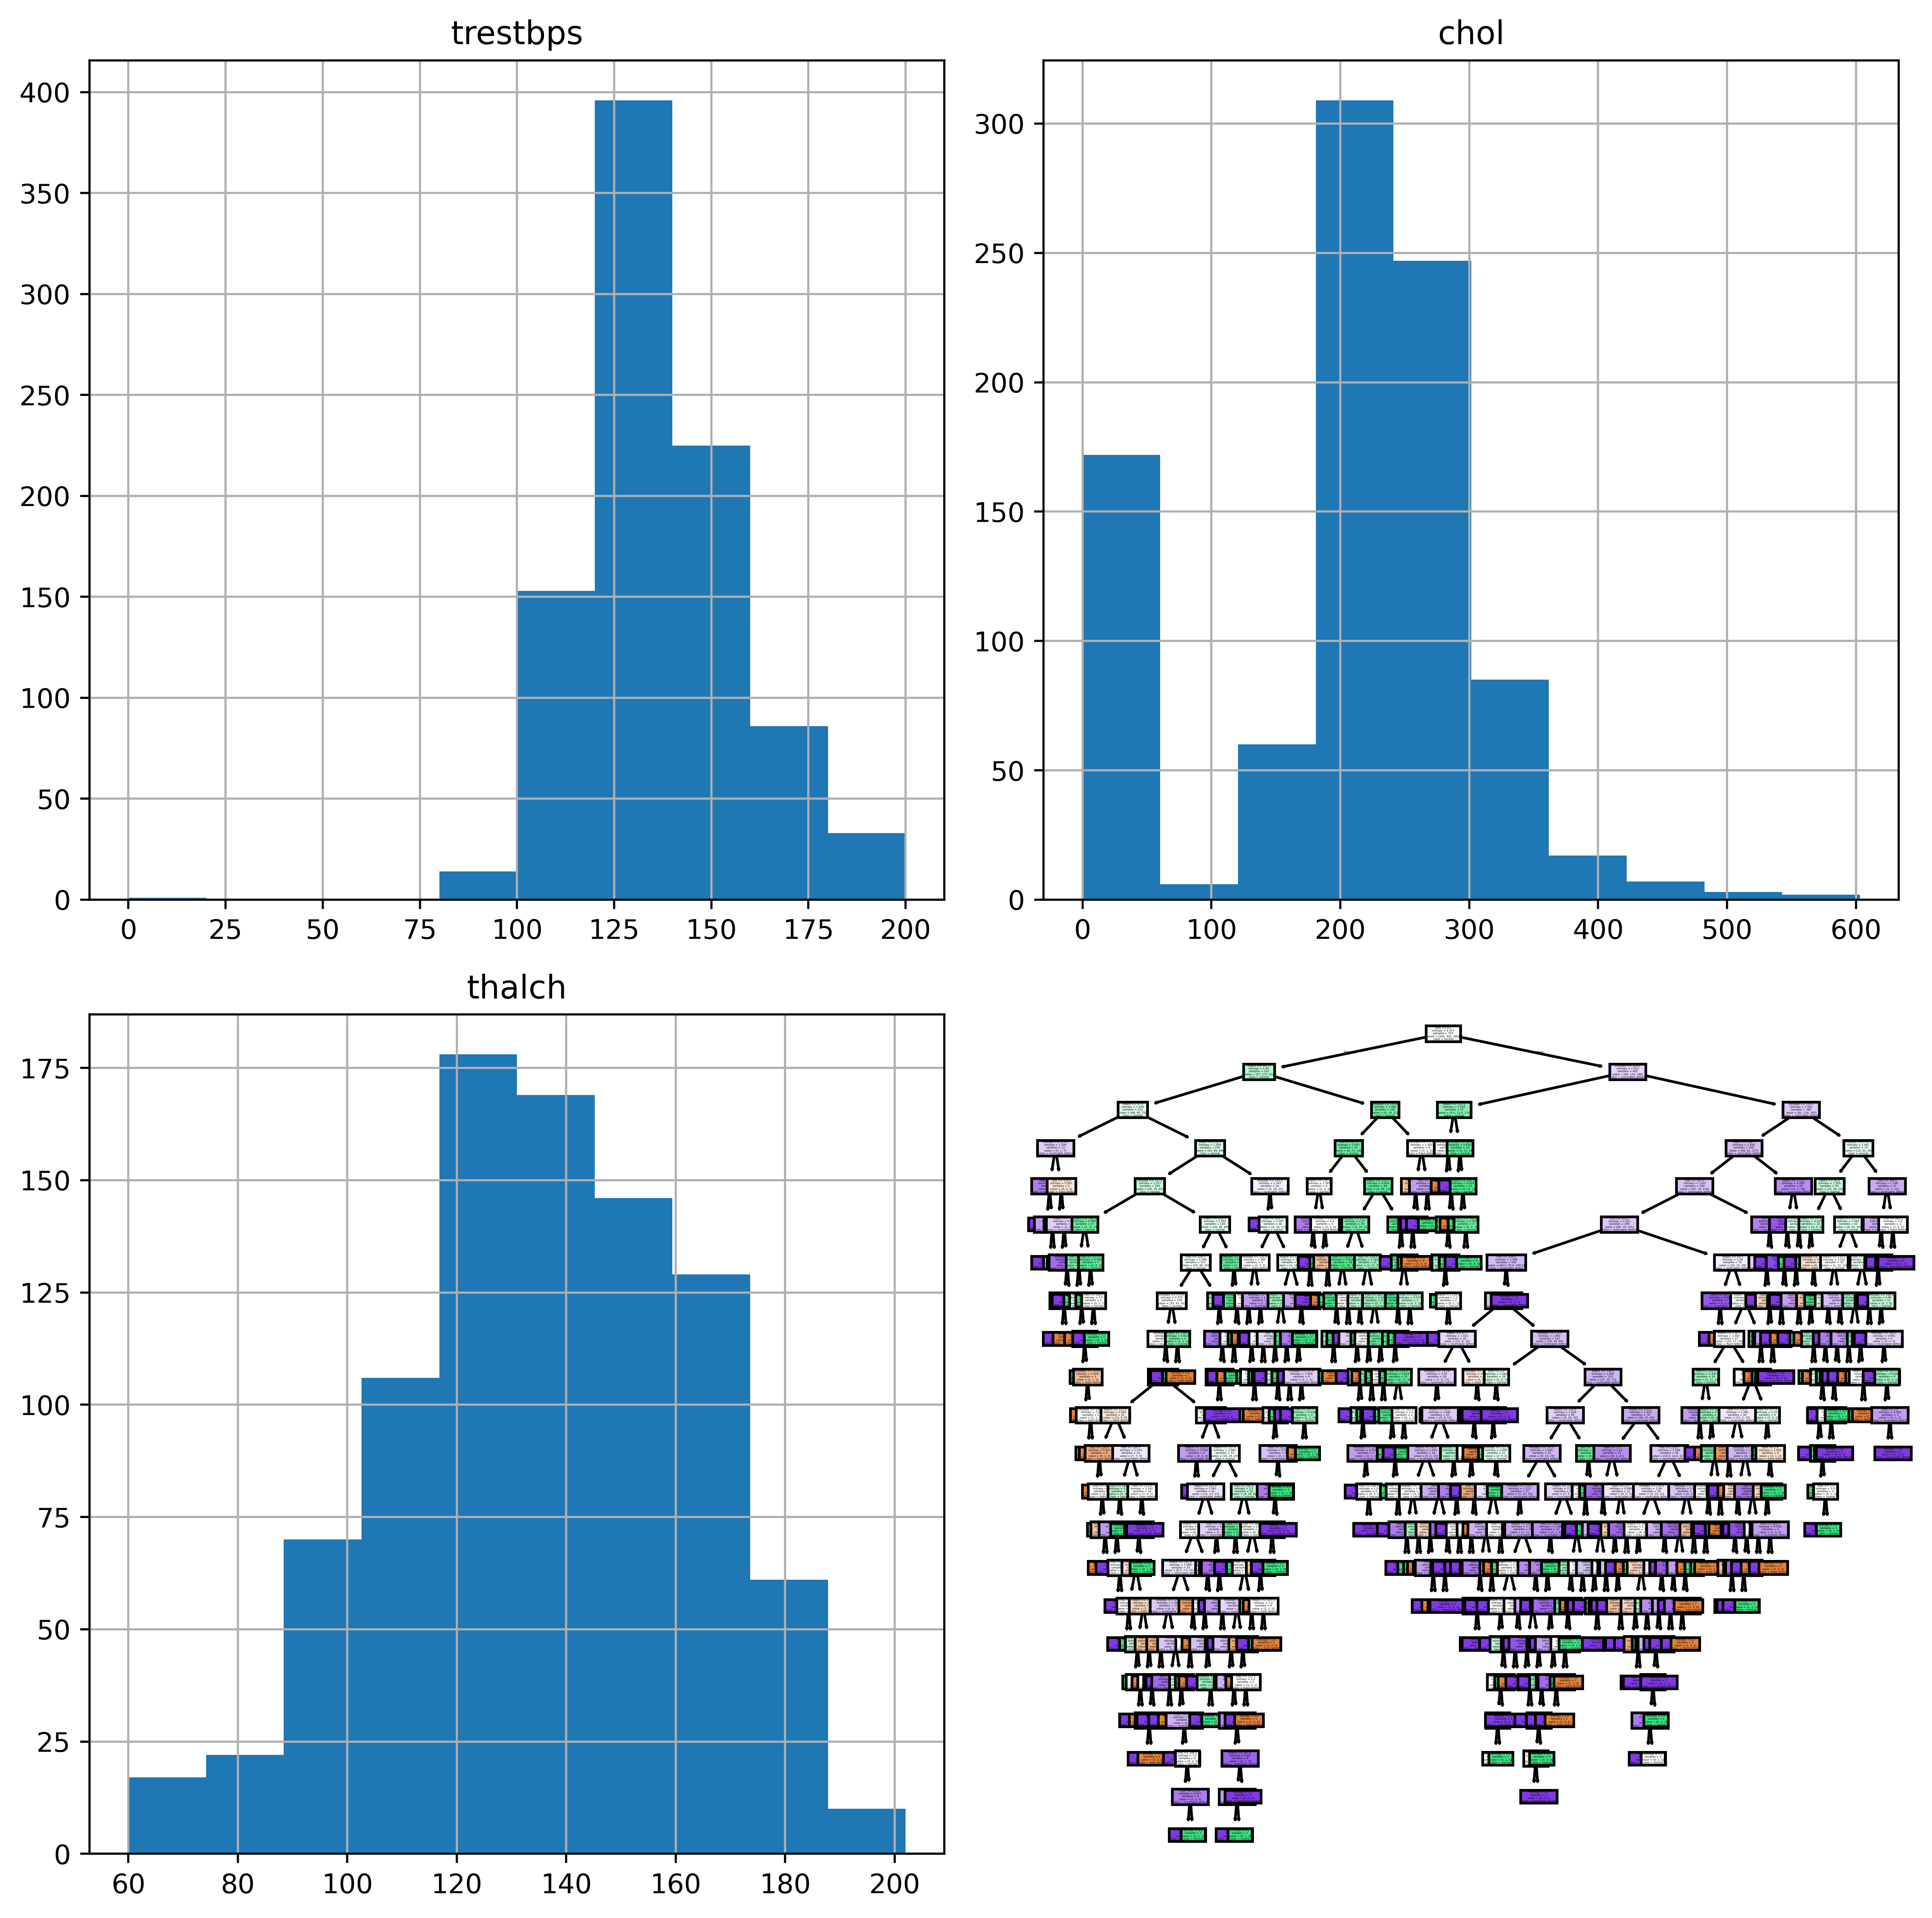

Index(['trestbps', 'chol', 'thalch', 'num'], dtype='object')

In [32]:
tree.plot_tree(dt, feature_names=x.columns,class_names=df['thal'].unique(), filled=True )
plt.show()

dt.feature_importances_      #It return information gain of all columns

x.columns

# CART

In [33]:
dtc = DecisionTreeClassifier(criterion='gini')      

In [34]:
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)

In [35]:
print(classification_report(ytest,ypred))

                   precision    recall  f1-score   support

     fixed defect       0.21      0.27      0.24        33
           normal       0.38      0.30      0.34        82
reversable defect       0.35      0.38      0.36        66

         accuracy                           0.33       181
        macro avg       0.31      0.32      0.31       181
     weighted avg       0.34      0.33      0.33       181



In [36]:
dtc.score(xtrain,ytrain), dtc.score(xtest,ytest)

(0.9958563535911602, 0.3259668508287293)

# Regression

In [37]:
df.head()

,trestbps,chol,thalch,thal,num
age,,,,,
63,145,233,150,fixed defect,0
41,135,203,132,fixed defect,0
57,140,192,148,fixed defect,0
52,118,186,190,fixed defect,0
57,110,201,126,fixed defect,0


In [38]:
df = pd.get_dummies(data = df, columns=['thal'], dtype=int)
df

,trestbps,chol,thalch,num,thal_fixed defect,thal_normal,thal_reversable defect
age,,,,,,,
63,145,233,150,0,1,0,0
41,135,203,132,0,1,0,0
57,140,192,148,0,1,0,0
52,118,186,190,0,1,0,0
57,110,201,126,0,1,0,0
...,...,...,...,...,...,...,...
53,125,0,120,4,0,0,1
62,166,170,120,4,0,0,1
56,170,0,123,4,0,1,0


In [39]:
x = df.drop(columns = ['num'])
y = df['num']

In [40]:
x

,trestbps,chol,thalch,thal_fixed defect,thal_normal,thal_reversable defect
age,,,,,,
63,145,233,150,1,0,0
41,135,203,132,1,0,0
57,140,192,148,1,0,0
52,118,186,190,1,0,0
57,110,201,126,1,0,0
...,...,...,...,...,...,...
53,125,0,120,0,0,1
62,166,170,120,0,0,1
56,170,0,123,0,1,0


In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state = 42)

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
dtr = DecisionTreeRegressor() 
dtr.fit(xtrain,ytrain) 
yp = dtr.predict(xtest)
yp

array([1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 3., 3., 3., 0., 0., 1., 1.,
       4., 2., 0., 0., 1., 4., 1., 1., 4., 1., 0., 2., 1., 0., 1., 0., 2.,
       3., 0., 2., 1., 0., 0., 1., 0., 0., 3., 0., 0., 0., 1., 0., 1., 2.,
       0., 3., 0., 1., 0., 0., 0., 2., 0., 0., 1., 1., 1., 1., 1., 1., 2.,
       2., 1., 3., 0., 1., 3., 1., 3., 3., 0., 1., 1., 1., 2., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 3., 0., 0., 0., 1., 1., 2., 1., 0., 1., 0.,
       0., 1., 3., 1., 0., 1., 2., 1., 2., 1., 3., 1., 3., 1., 1., 1., 0.,
       1., 0., 3., 1., 1., 1., 4., 0., 4., 1., 1., 0., 0., 0., 2., 1., 1.,
       1., 1., 3., 0., 0., 2., 4., 2., 4., 0., 0., 0., 1., 3., 1., 0., 1.,
       2., 0., 1., 0., 0., 0., 1., 0., 1., 2., 4., 3., 0., 1., 0., 0., 0.,
       1., 2., 0., 0., 1., 2., 1., 3., 2., 0., 0.])

In [44]:
dtr.score(xtrain,ytrain), dtr.score(xtest,ytest)

(0.9978539627585471, -0.5039370078740157)

In [45]:
x.columns

Index(['trestbps', 'chol', 'thalch', 'thal_fixed defect', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

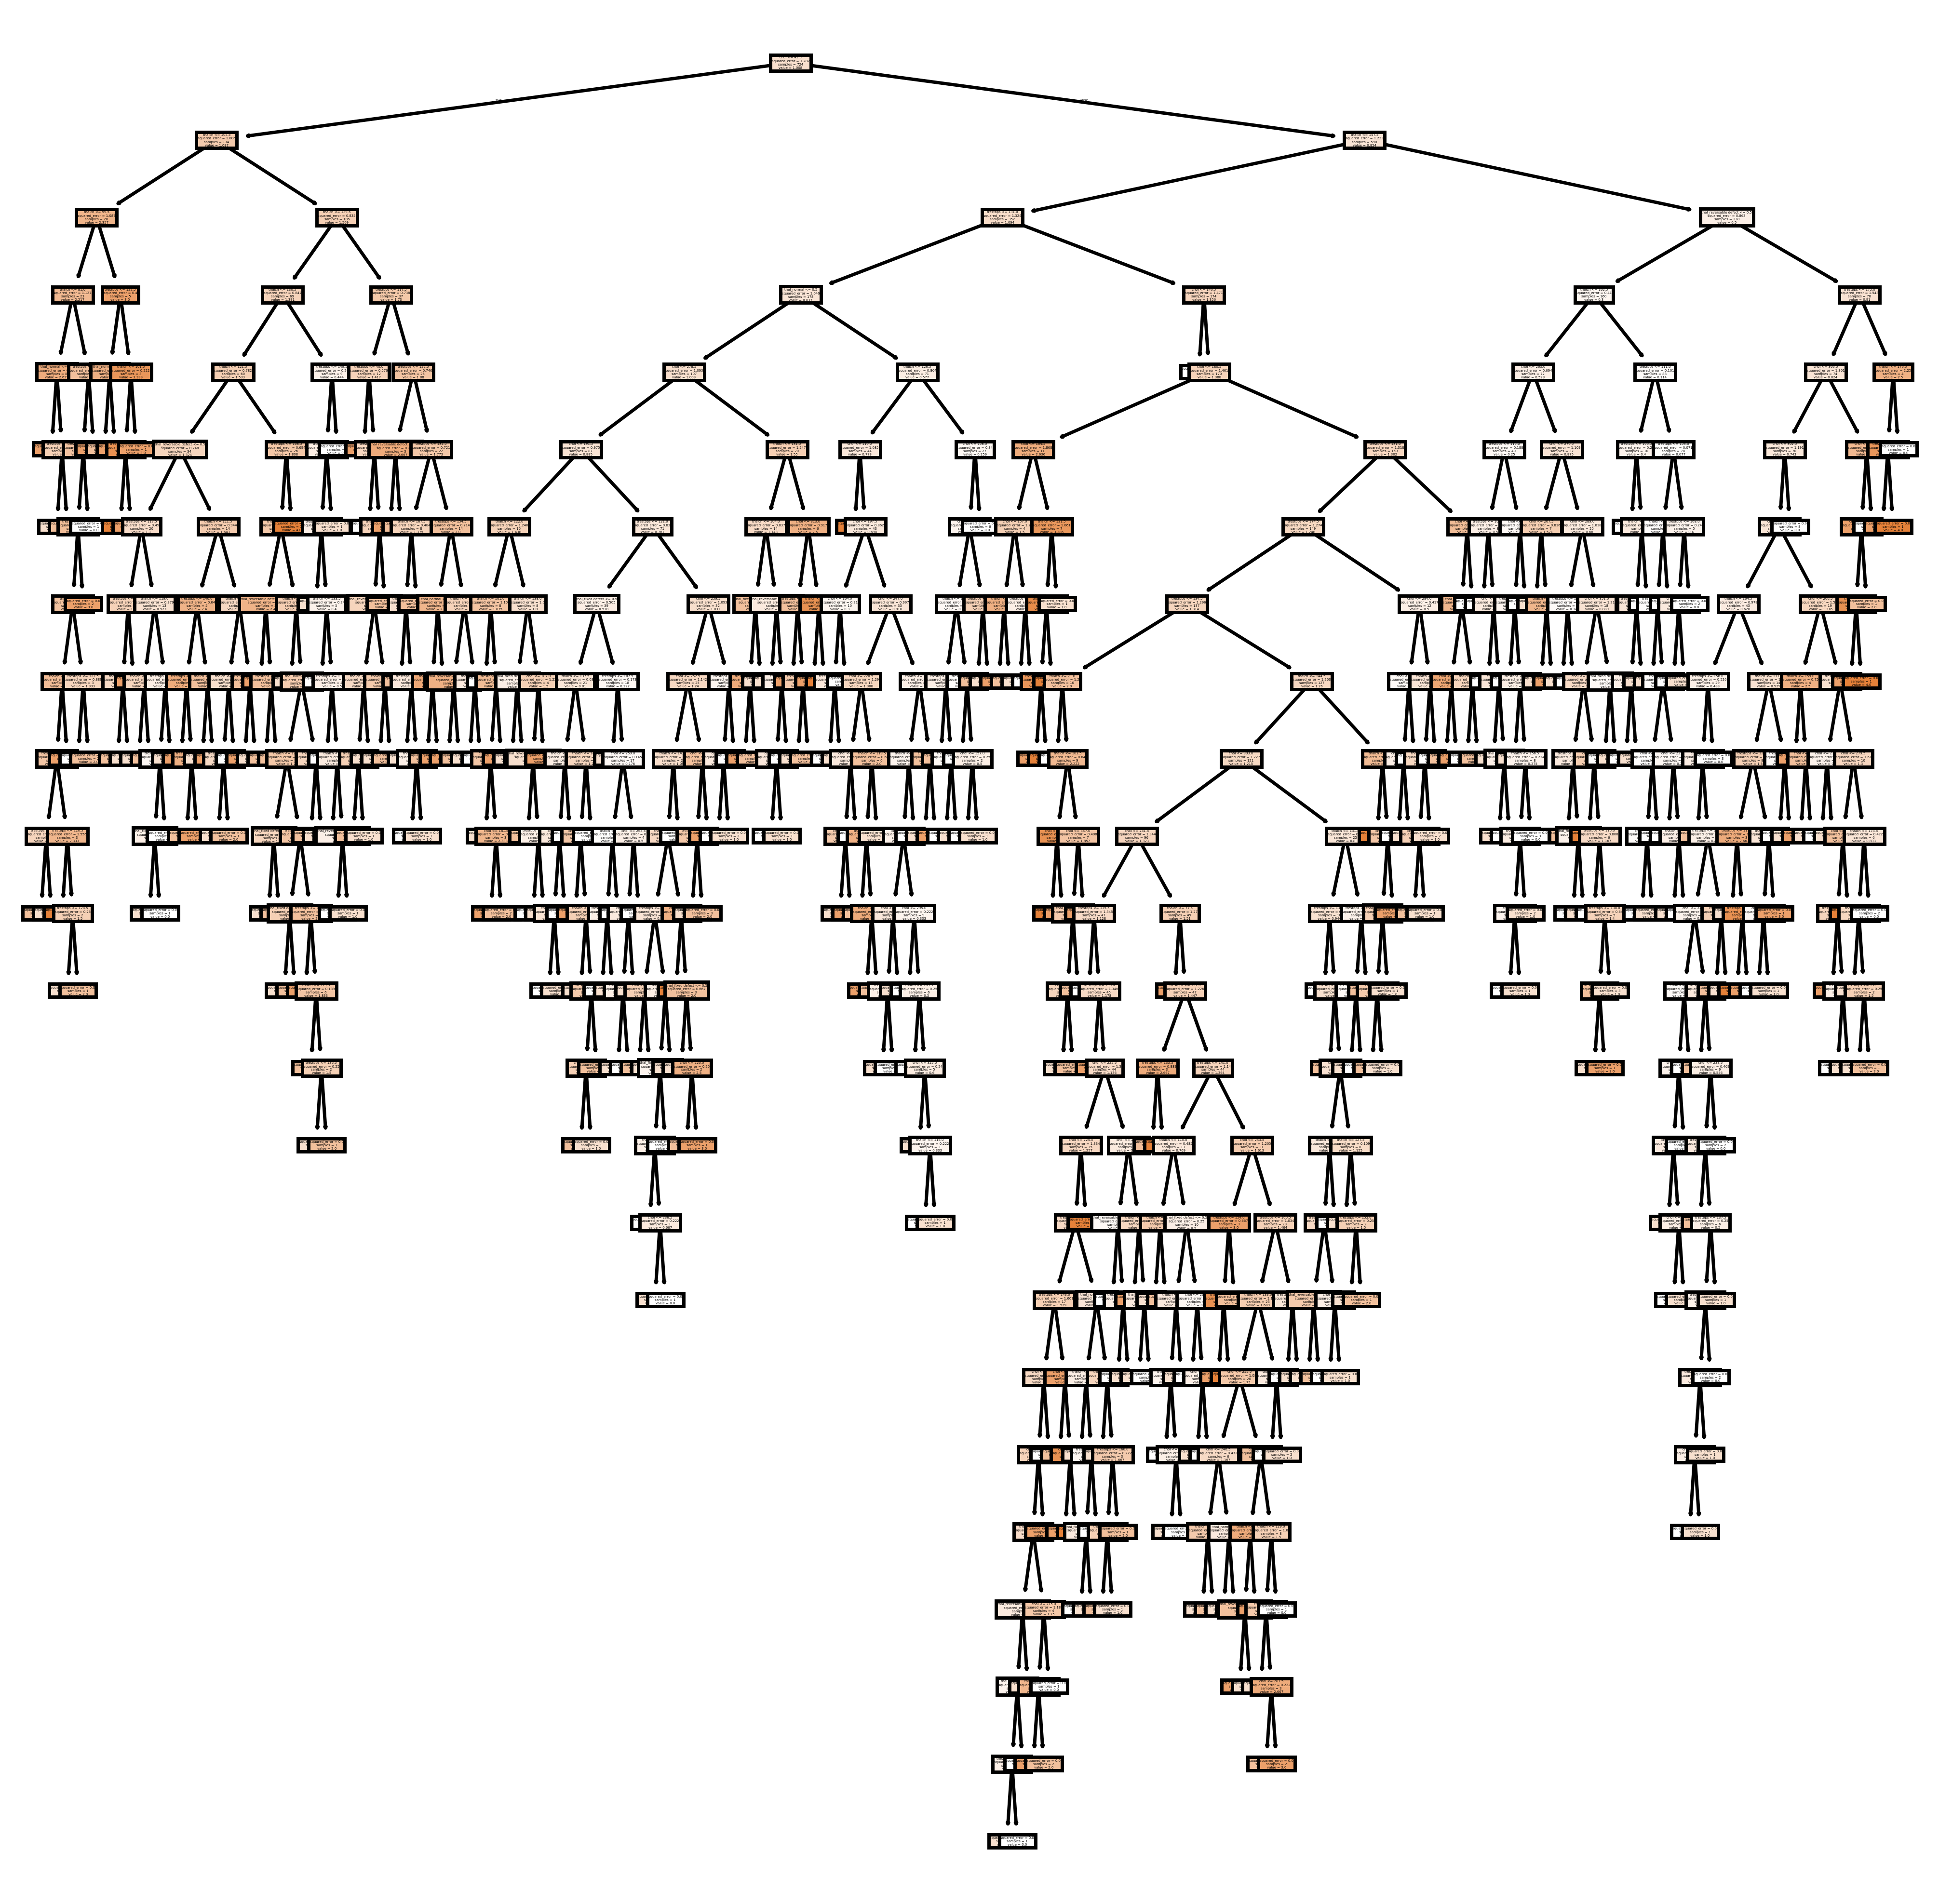

In [46]:
tree.plot_tree(dtr, feature_names=x.columns, filled=True)
plt.show()

In [47]:
df.dtypes

trestbps                  int64
chol                      int64
thalch                    int64
num                       int64
thal_fixed defect         int32
thal_normal               int32
thal_reversable defect    int32
dtype: object

# Hyperparameter tuning

In [48]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
params = {
    'criterion' : ['squared_error','absolute_error'],
    'max_depth' : [3,5,7,9,11],
    'splitter' :['best','random']
}

In [51]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params,
                   verbose=1)

In [52]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'splitter': ['best', 'random']},
             verbose=1)

In [53]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 5, 'splitter': 'random'}

In [54]:
dtr = DecisionTreeRegressor(criterion='squared_error',
                           max_depth=3,splitter='best')

In [55]:
dtr.fit(xtrain,ytrain)
ypred  = dtr.predict(xtest)

In [56]:
dtr.score(xtrain,ytrain),dtr.score(xtest,ytest)

(0.20403452411398582, 0.2041010697570853)

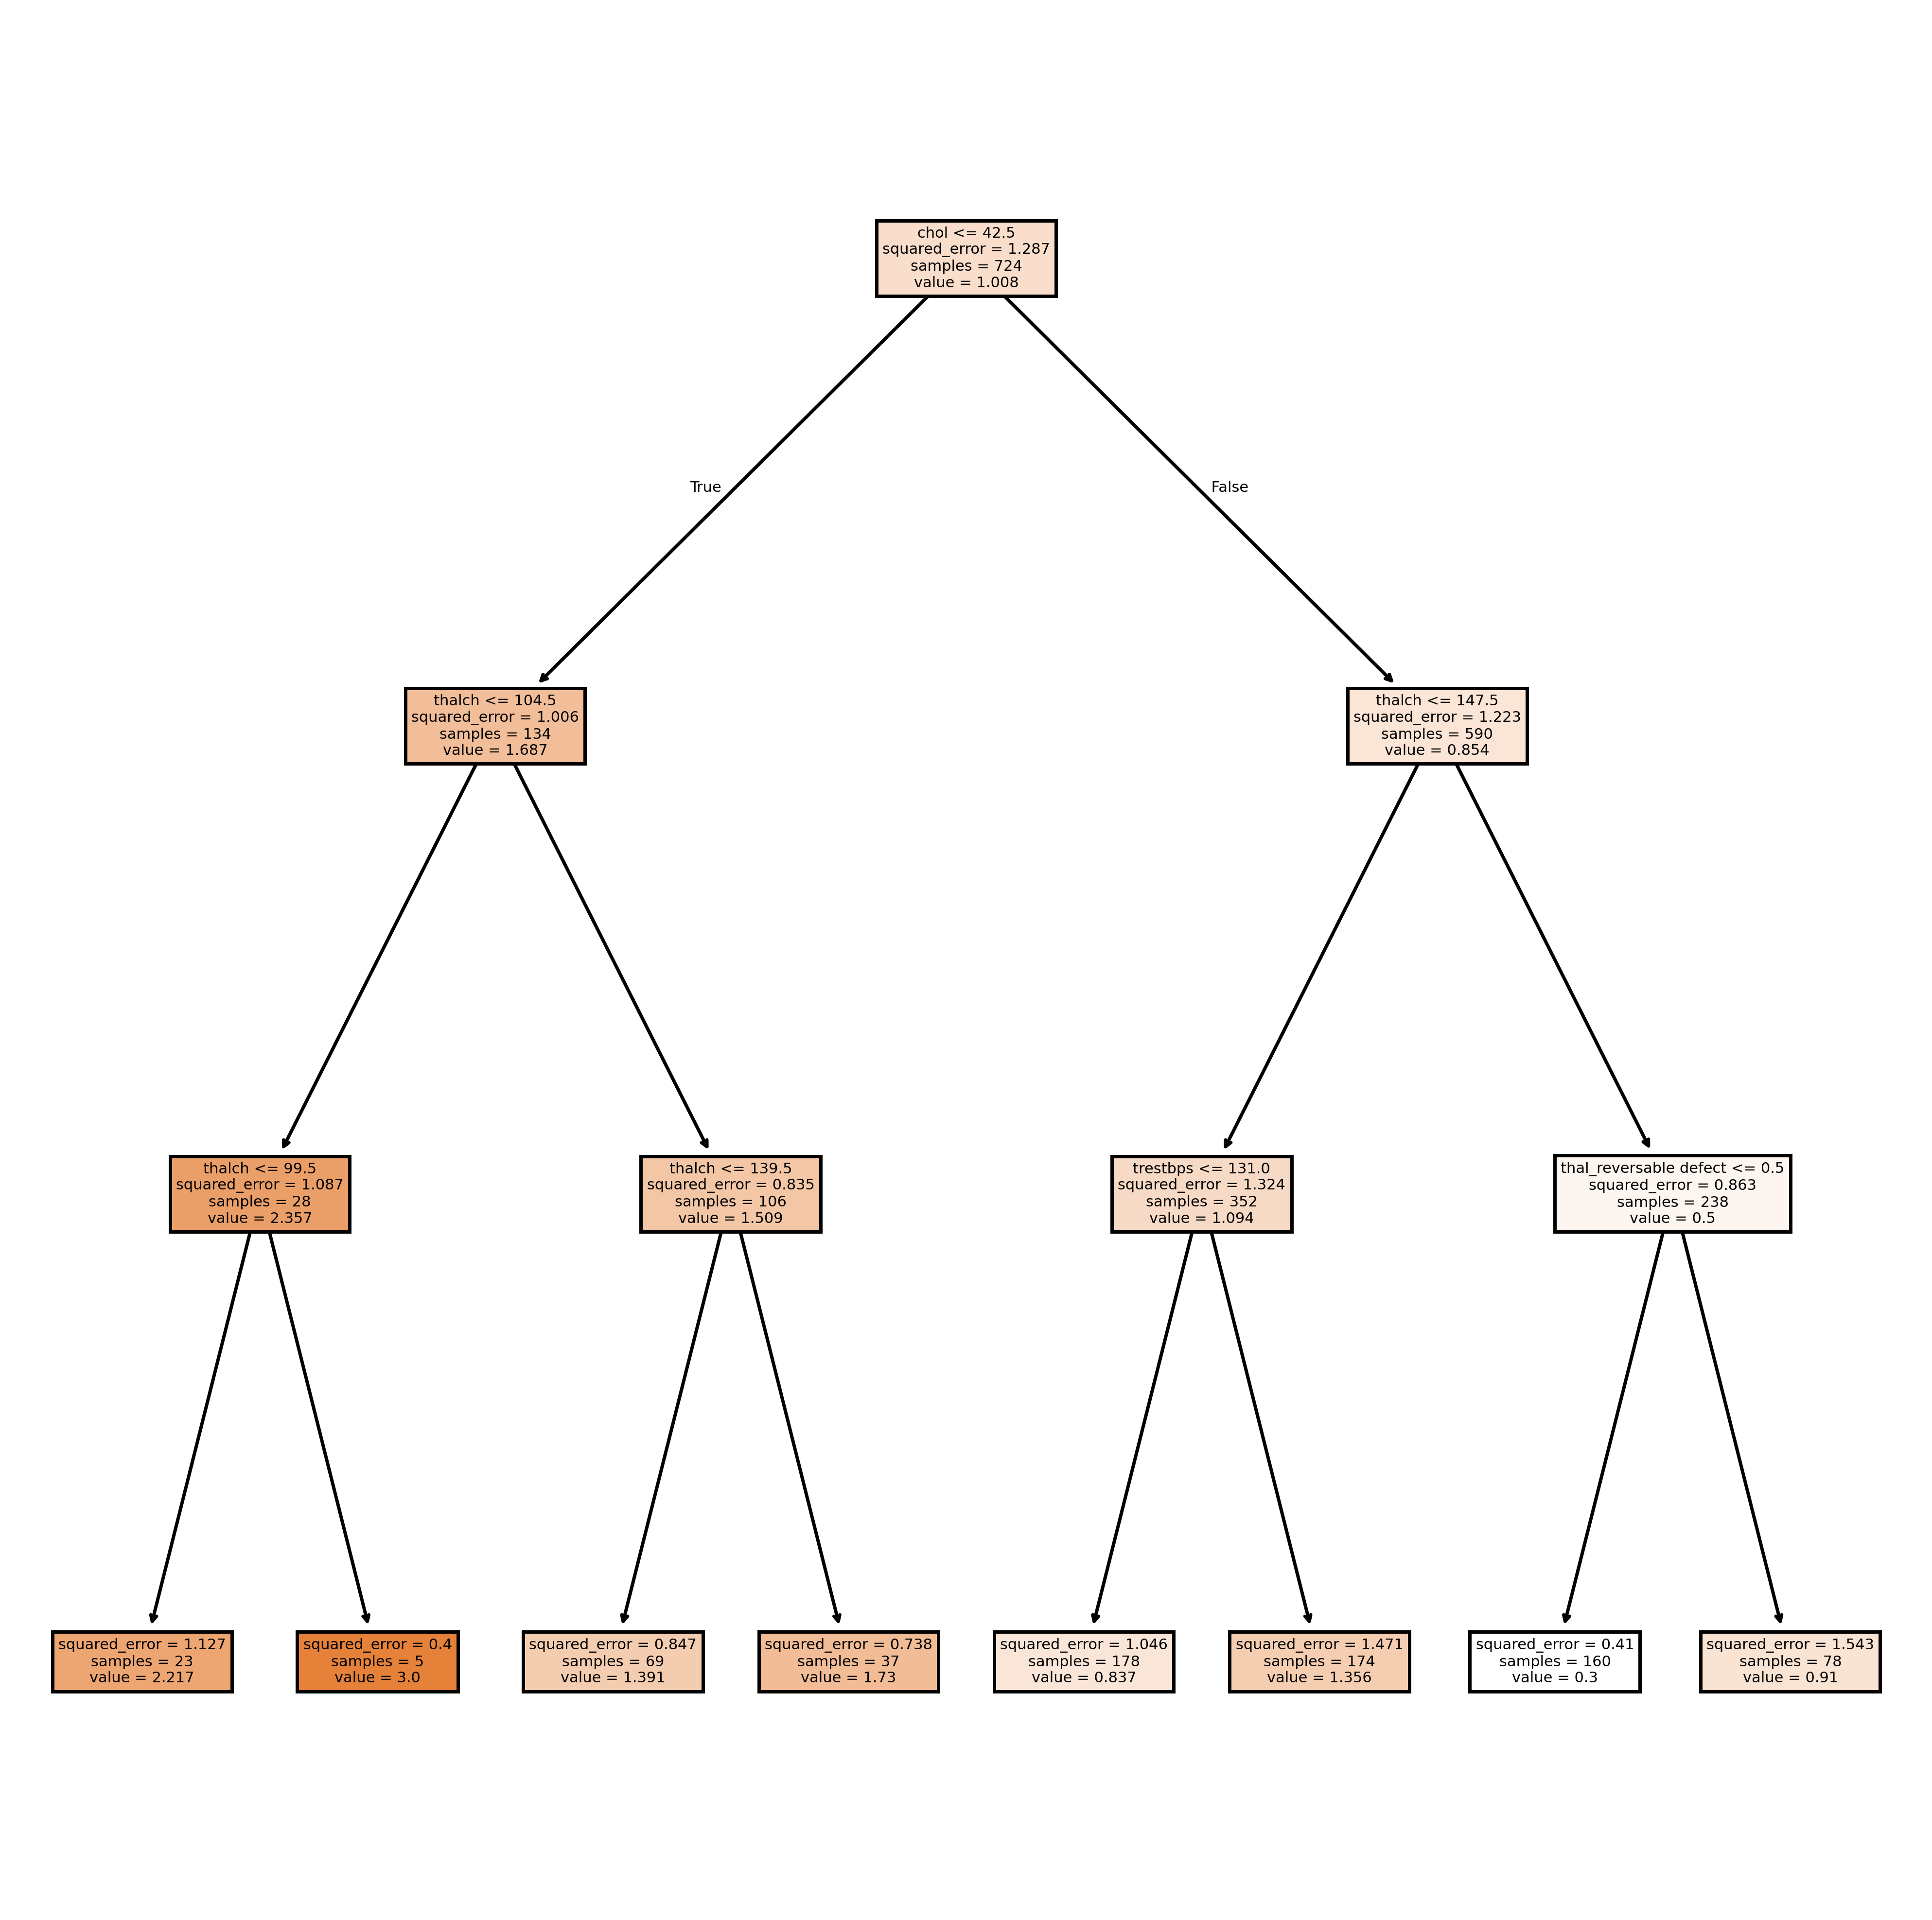

In [57]:
tree.plot_tree(dtr, feature_names=x.columns,filled=True)
plt.show()

# Interview Questions

### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

1. max_depth – Limits the depth of the tree; prevents overfitting (too deep) or underfitting (too shallow).

2. min_samples_split – Minimum samples required to split a node; higher values reduce overfitting.

3. min_samples_leaf – Minimum samples per leaf; larger values create simpler trees and reduce variance.

4. max_features – Number of features considered for best split; lower values increase bias, higher values reduce variance.

5. criterion – Splitting measure (gini or entropy); affects impurity calculation and decision-making.

6. max_leaf_nodes – Limits the number of leaf nodes; controls model complexity.

### 2. What is the difference between the Label encoding and One-hot encoding?

 Label Encoding assigns a unique numerical value to each category (e.g., "red" → 0, "blue" → 1, "green" → 2). It is simple but may introduce an unintended ordinal relationship.

One-Hot Encoding creates binary columns for each category (e.g., "red" → [1,0,0], "blue" → [0,1,0], "green" → [0,0,1]). It avoids ordinal issues but increases dimensionality, especially for many categories.

Use Case:

Label Encoding is preferable for ordinal data.

One-Hot Encoding is better for nominal (non-ordered) categorical data.